# Solving a second order i.v.p. with `solve_ivp`.

In the preparation notebook, you learned how to use the function `solve_ivp` from the `scipy.integrate` package to find numeric solutions to a system of first order i.v.p.'s 

$$\begin{cases}
\frac{du}{dt} &= f_1(t,u,v)\\
\frac{dv}{dt} &= f_2(t,u,v)\\
u(t_0) &= u_0\\
v(t_0) &= v_0
\end{cases}$$

Let's import it (and the other stuff we usually need):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

For, example, if the system of i.v.p.'s is

$$\begin{cases}
\frac{du}{dt} &= tuv,\\
\frac{dv}{dt} &= u,\\
u(0) &= 1\\
v(0) &= 2
\end{cases}$$

and if we want to calculate a numerical solution on the interval $[0,1]$, with an output corresponding to 500 equally spaced $t$-values on this interval, we learned that the following code will do the trick:

In [2]:
def F(t,Y) :
    dudt = t*Y[0]*Y[1]
    dvdt = Y[0]
    return (dudt,dvdt)

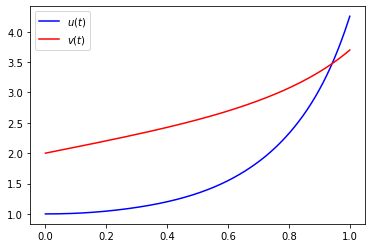

In [3]:
t = np.linspace(0,1,500)
sol = solve_ivp(F,[0,1],[1,2],t_eval=t)

plt.plot(sol.t,sol.y[0],'b',label=r'$u(t)$')
plt.plot(sol.t,sol.y[1],'r',label=r'$v(t)$')
plt.legend()
plt.show()

## Exercise

In the previous exercise you saw that the second order initial value problem

$$y''+\frac{c}{m}y'+\frac{k}{m}y=f(t),\quad y(0)=y_0,\quad y'(0)=v_0,$$

can, by setting $v=y'$, be rewritten into the system

$$\begin{cases}
\frac{dy}{dt} &= v,\\
\frac{dv}{dt} &= f(t)-\frac{c}{m}v-\frac{k}{m}y,\\
y(0) &= y_0,\\
v(0) &= v_0.
\end{cases}$$

Set $m=k=1$, $c=2$, $y_0=v_0=0$ and let
$$f(t)=\begin{cases}
1 & \text{ for }t\leq 1,\\
0 & \text{ for }t> 1.
\end{cases}$$

Use the `solve_ivp` function to find a numerical solution to this i.v.p. Tell `solve_ivp` to provide values for 1000 equally distributed points `t` from $0$ to $5$.

To help you, the function $f$ above can be implemented as below:

In [20]:
def f(t) :
    if t<=1 :
        u = 1
    else :
        u = 0
    return u

def F(t,Y) :
    dydt = Y[1]
    dvdt = f(t) - (2)*Y[1] - Y[0]
    return (dydt,dvdt)

## To submit in LAMS
Plot the graph of the solution $y(t)$ for $t\in [0,5]$ using 1000 points. Submit the plot in LAMS. Your plot should **only** contain the graph of $y(t)$. It should **not** contain the graph of $y'(t)$.

You know that the i.v.p. describes a damped oscillator, released from rest ($v_0=0$) with no initial displacement ($y_0=0$) but affected by a unit external force from $t=0$ to $t=1$, after which there is no external force on the system. With this knowledge, you should be able to judge whether or not your plot makes sense.

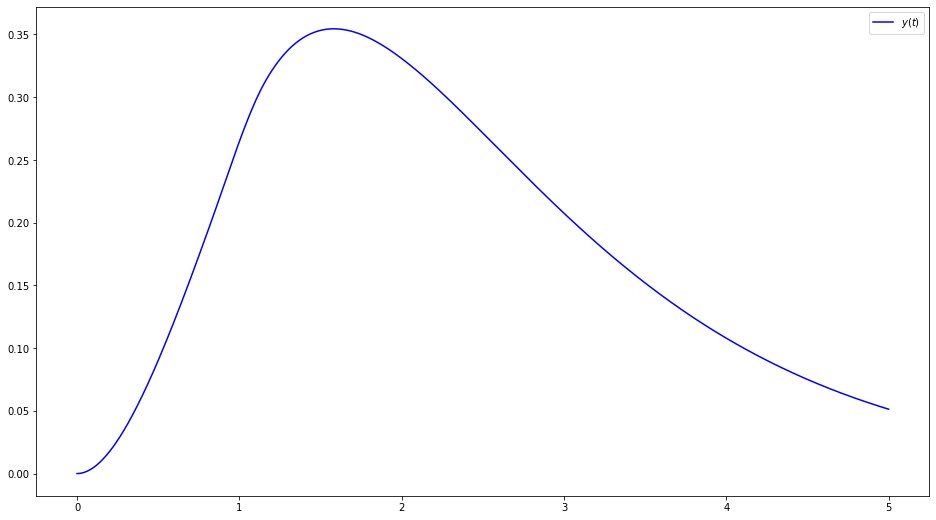

In [24]:
t = np.linspace(0,5,1000)
sol = solve_ivp(F,[0,5],[0,0],t_eval=t)

plt.figure(figsize=(16,9))
plt.plot(sol.t,sol.y[0],'b',label=r'$y(t)$')
plt.legend()

plt.savefig('damp.png')
plt.show()